In [1]:
!python --version

Python 3.10.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')

#Importing the data
credit_df = pd.read_csv("german_credit_data.csv", index_col=0)
job_category = ['unskilled and non-resident', 'unskilled and resident', 'skilled', 'highly skilled']
credit_df['Job'] = credit_df['Job'].replace([0, 1, 2, 3], job_category)
credit_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,skilled,own,NaN,little,1169,6,radio/TV,good
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled and resident,own,little,NaN,2096,12,education,good
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled,free,little,little,4870,24,car,bad


In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 85.9+ KB


In [4]:
credit_df.shape

(1000, 10)

In [5]:
credit_df.describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [6]:
credit_df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [7]:
credit_df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [8]:
print("Saving accounts", credit_df['Saving accounts'].unique())
print("Checking accounts", credit_df['Checking account'].unique())

Saving accounts [nan 'little' 'quite rich' 'rich' 'moderate']
Checking accounts ['little' 'moderate' nan 'rich']


In [9]:
credit_df["Saving accounts"].fillna("none", inplace=True)
credit_df["Checking account"].fillna("none", inplace=True)

In [10]:
credit_df.isna().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

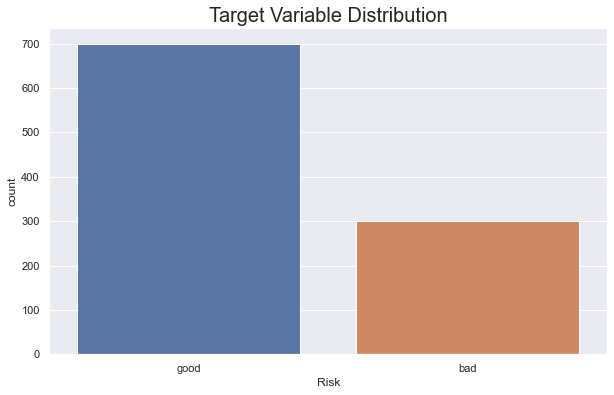

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=credit_df, x="Risk")
plt.title("Target Variable Distribution", fontsize=20)
plt.show()

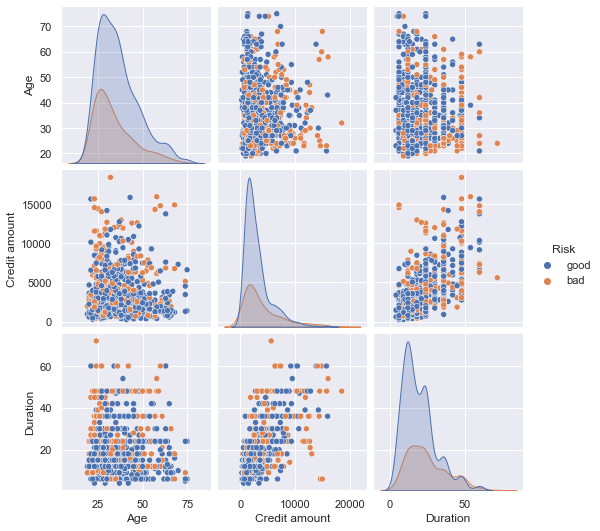

In [12]:
sns.pairplot(credit_df, hue="Risk")
plt.show()

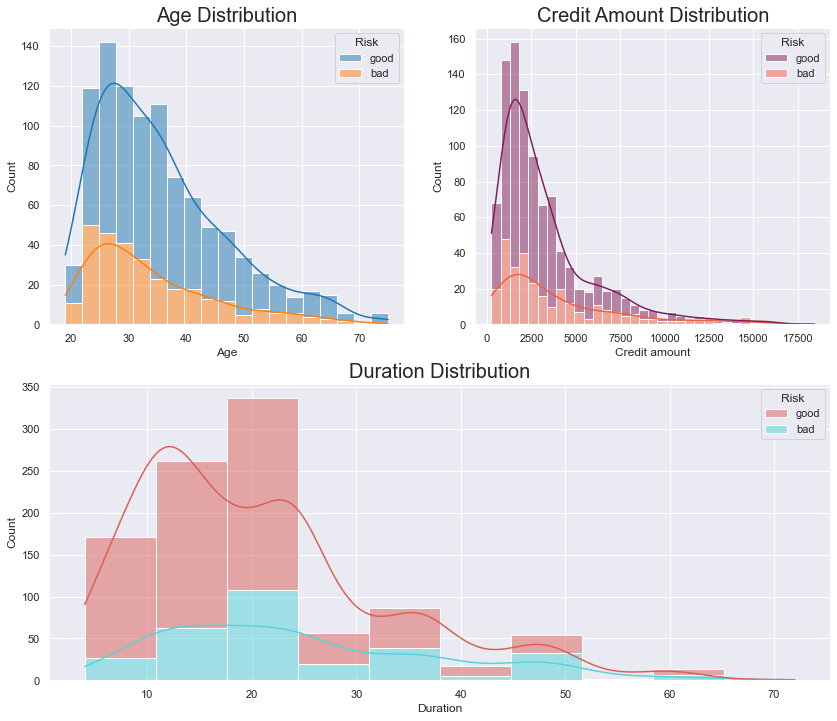

In [13]:
plt.figure(figsize=(14, 12))

plt.subplot(221)
ax1 = sns.histplot(data=credit_df, x='Age', hue='Risk', multiple='stack', palette='tab10', kde=True)
ax1.set_title("Age Distribution", fontsize=20)

plt.subplot(222)
ax2 = sns.histplot(data=credit_df, x='Credit amount', hue='Risk', multiple='stack', palette='rocket', kde=True)
ax2.set_title("Credit Amount Distribution", fontsize=20)

plt.subplot(212)
ax3 = sns.histplot(data=credit_df, x='Duration', hue='Risk', multiple='stack', palette='hls', kde=True, bins=10)
ax3.set_title("Duration Distribution", fontsize=20)

plt.show()

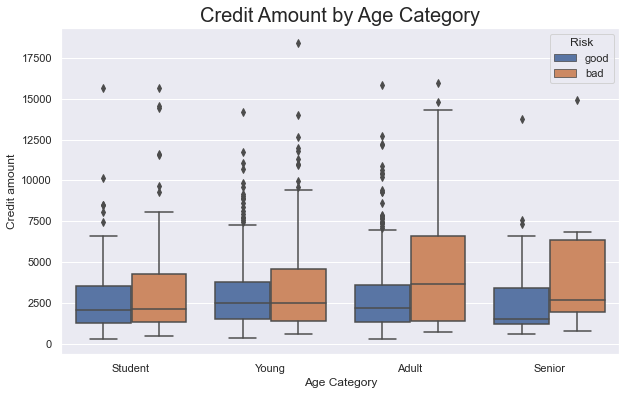

In [14]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
credit_df["Age Category"] = pd.cut(credit_df.Age, interval, labels=cats)

plt.figure(figsize=(10, 6))
plt.title("Credit Amount by Age Category", fontsize=20)
sns.boxplot(data=credit_df, x='Age Category', y='Credit amount', hue='Risk')
plt.show()

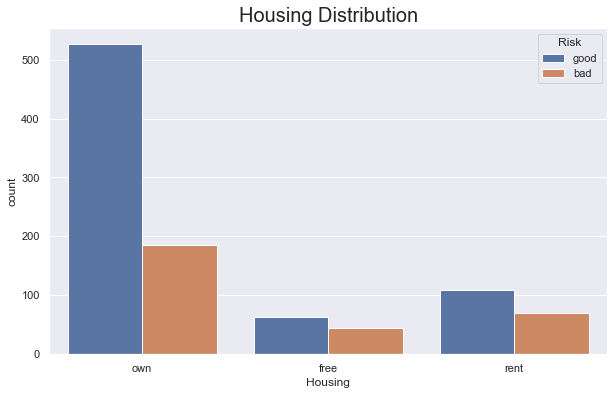

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=credit_df, x='Housing', hue='Risk')
plt.title("Housing Distribution", fontsize=20)
plt.show()

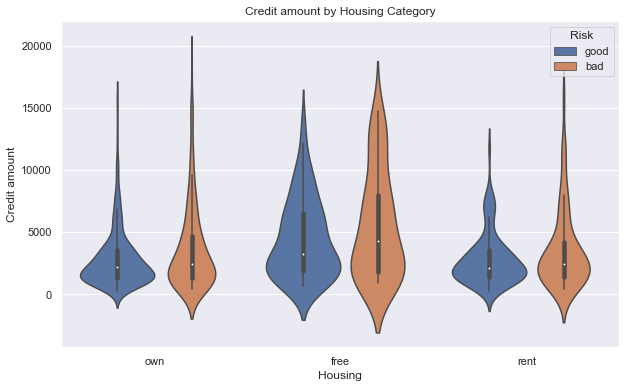

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=credit_df, x='Housing', y='Credit amount', hue='Risk')
plt.title("Credit amount by Housing Category")
plt.show()

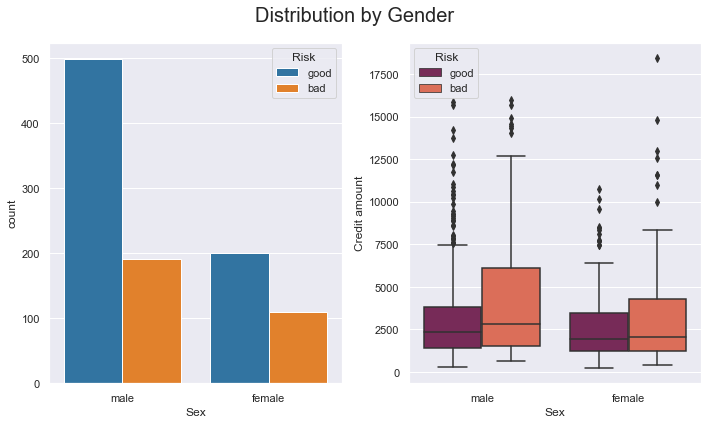

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle("Distribution by Gender", fontsize=20)
sns.countplot(data=credit_df, x='Sex', hue='Risk', palette='tab10', ax=ax1)
sns.boxplot(data=credit_df, x='Sex', y='Credit amount', palette='rocket', hue='Risk', ax=ax2)
fig.tight_layout()
plt.show()

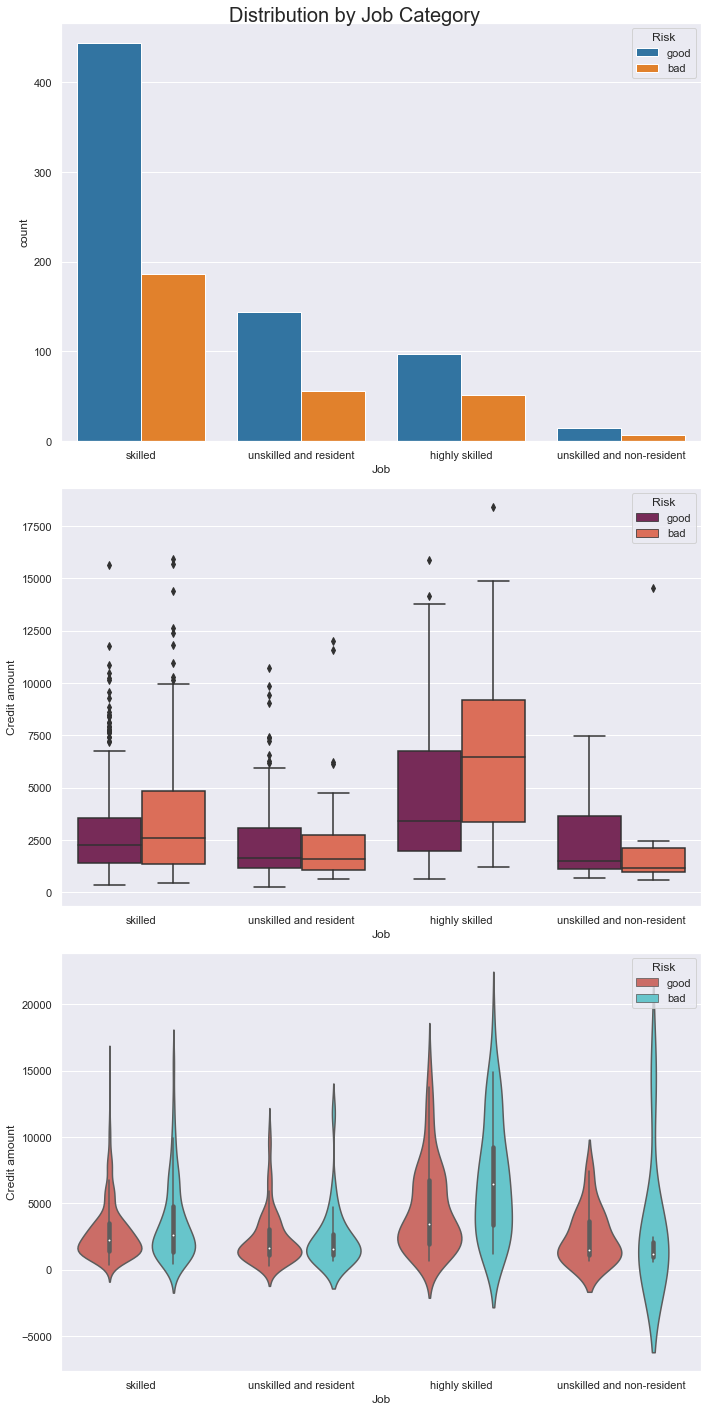

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 20))
fig.suptitle("Distribution by Job Category", fontsize=20)
sns.countplot(data=credit_df, x='Job', hue='Risk', palette='tab10', ax=ax1)
sns.boxplot(data=credit_df, x='Job', y='Credit amount', palette='rocket', hue='Risk', ax=ax2)
sns.violinplot(data=credit_df, x='Job', y='Credit amount', palette='hls', hue='Risk', ax=ax3)
fig.tight_layout()
plt.show()

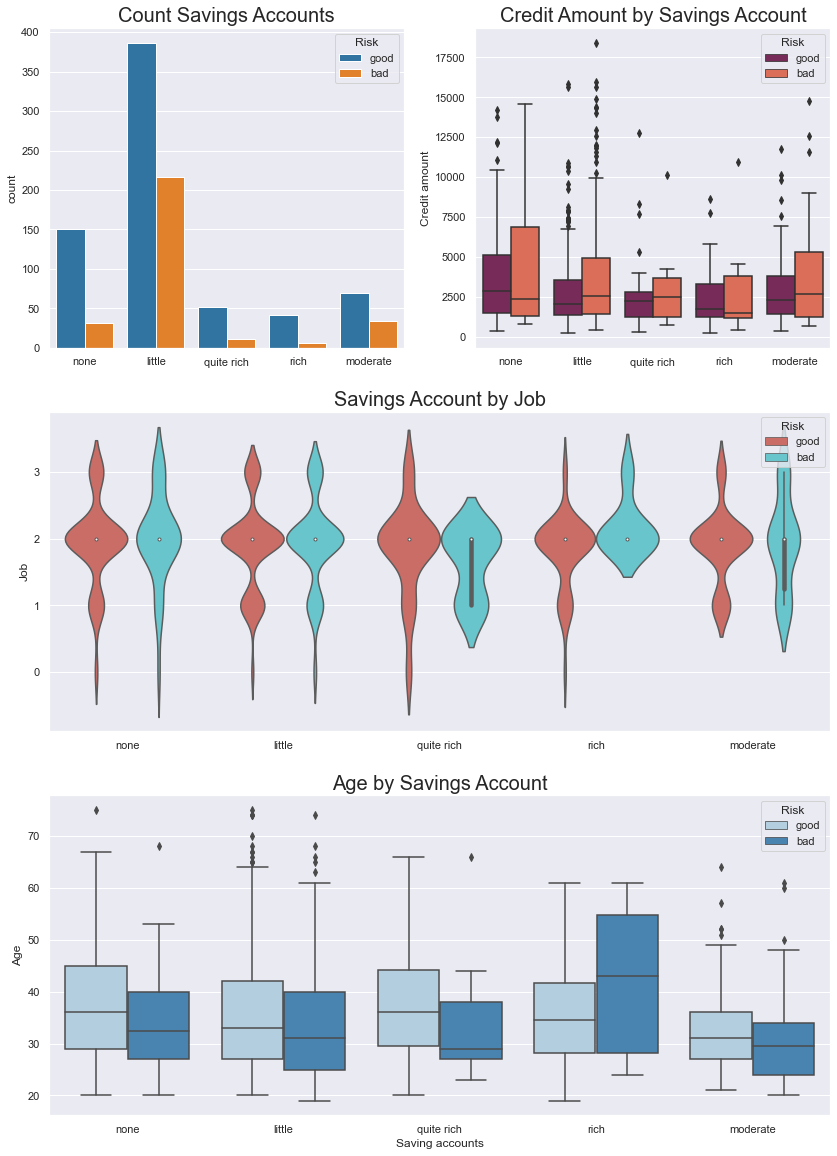

In [19]:
plt.figure(figsize=(14, 20))
plt.subplot(321)
ax1 = sns.countplot(data=credit_df, x='Saving accounts', hue='Risk', palette='tab10')
ax1.set_title("Count Savings Accounts", fontsize=20)
ax1.set_xlabel("")

plt.subplot(322)
ax2 = sns.boxplot(data=credit_df, x='Saving accounts', y='Credit amount', hue='Risk', palette='rocket')
ax2.set_title("Credit Amount by Savings Account", fontsize=20)
ax2.set_xlabel("")

plt.subplot(312)
credit_df['Job'] = credit_df['Job'].replace(job_category, [0, 1, 2, 3])
ax3 = sns.violinplot(data=credit_df, x='Saving accounts', y='Job', hue='Risk', palette='hls')
ax3.set_title("Savings Account by Job", fontsize=20)
ax3.set_xlabel("")

plt.subplot(313)
ax4 = sns.boxplot(data=credit_df, x='Saving accounts', y='Age', hue='Risk', palette='Blues')
ax4.set_title("Age by Savings Account", fontsize=20)

plt.show()

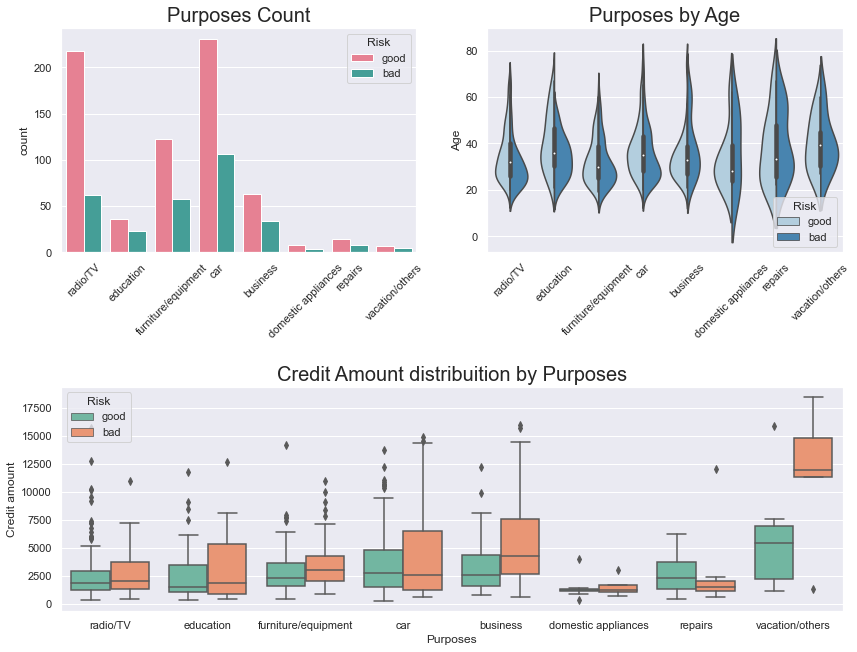

In [20]:
plt.figure(figsize = (14,12))

plt.subplot(221)
ax1 = sns.countplot(data=credit_df, x="Purpose", palette="husl", hue = "Risk")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_xlabel("")
ax1.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
ax2 = sns.violinplot(data=credit_df, x="Purpose", y="Age", palette="Blues", hue = "Risk",split=True)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax2.set_xlabel("")
ax2.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
ax3 = sns.boxplot(data=credit_df, x="Purpose", y="Credit amount", palette="Set2", hue = "Risk")
ax3.set_xlabel("Purposes")
ax3.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()